In [1]:
!pip install plotly


In [36]:
import pandas as pd # data clinig
import plotly.express as px #data visualization
import plotly.graph_objects as go #Advanced and custmise graph
import plotly.io as pio #graph tamplets custmise
import plotly.colors as colors 
pio.templates.default="plotly_white"

In [14]:
data=pd.read_csv("Sample - Superstore.csv",encoding ='latin-1')

In [15]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [16]:
data.describe()#undestanding descriptive data

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [21]:
data.info() #  for other information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

# Converting Date columns

In [22]:
data['Order Date']=pd.to_datetime(data['Order Date'])
data['Ship Date']=pd.to_datetime(data['Ship Date'])

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [25]:
data['Order Month']=data['Order Date'].dt.month
data['Order Year']=data['Order Date'].dt.year
data['Order Day of Week']=data['Order Date'].dt.dayofweek

# Monthly Sales analysis

In [47]:
sales_by_month=data.groupby('Order Month')['Sales'].sum().reset_index()
sales_by_month
                           

,Order Month,Sales
0,1,94924.8356
1,2,59751.2514
2,3,205005.4888
3,4,137762.1286
4,5,155028.8117
5,6,152718.6793
6,7,147238.0970
7,8,159044.0630
8,9,307649.9457
9,10,200322.9847


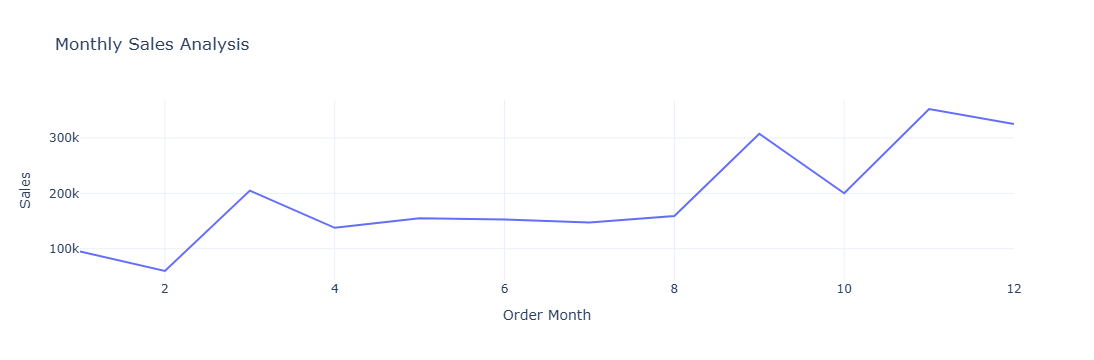

In [28]:
fig=px.line(sales_by_month,
            x='Order Month',
            y='Sales',
            title='Monthly Sales Analysis')
fig.show()

# Sales By Category

In [32]:
sales_by_category=data.groupby('Category')['Sales'].sum().reset_index()

In [33]:
sales_by_category


,Category,Sales
0,Furniture,741999.7953
1,Office Supplies,719047.0320
2,Technology,836154.0330


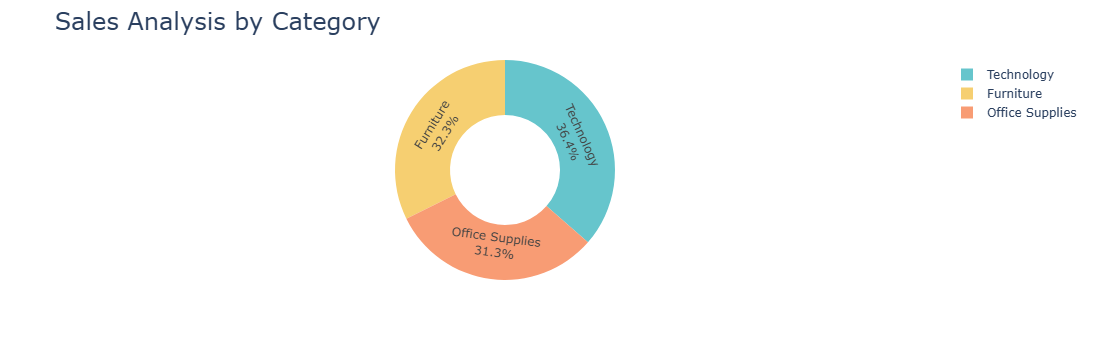

In [45]:
fig= px.pie(sales_by_category,values='Sales',names='Category',hole=0.5,color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_traces(textposition='inside',textinfo='percent+label')
fig.update_layout(title_text='Sales Analysis by Category',title_font=dict(size=24))
fig.show()

# Sales Analysis by Sub Category

In [49]:
sales_by_sub_subcategory=data.groupby('Sub-Category')['Sales'].sum().reset_index()
sales_by_sub_subcategory

,Sub-Category,Sales
0,Accessories,167380.3180
1,Appliances,107532.1610
2,Art,27118.7920
3,Binders,203412.7330
4,Bookcases,114879.9963
5,Chairs,328449.1030
6,Copiers,149528.0300
7,Envelopes,16476.4020
8,Fasteners,3024.2800
9,Furnishings,91705.1640


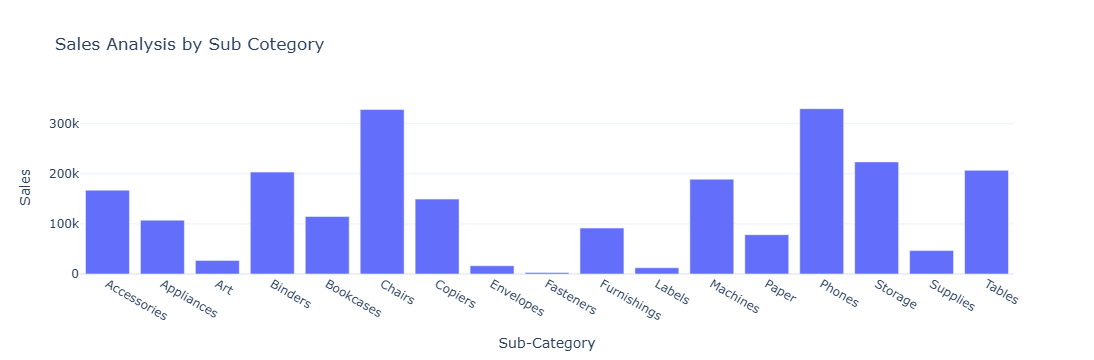

In [50]:
fig=px.bar(sales_by_sub_subcategory,
            x='Sub-Category',
            y='Sales',
            title='Sales Analysis by Sub Cotegory')
fig.show()

# Monthly Profit analysis

In [51]:
profit_by_month=data.groupby('Order Month')['Profit'].sum().reset_index()
profit_by_month

,Order Month,Profit
0,1,9134.4461
1,2,10294.6107
2,3,28594.6872
3,4,11587.4363
4,5,22411.3078
5,6,21285.7954
6,7,13832.6648
7,8,21776.9384
8,9,36857.4753
9,10,31784.0413


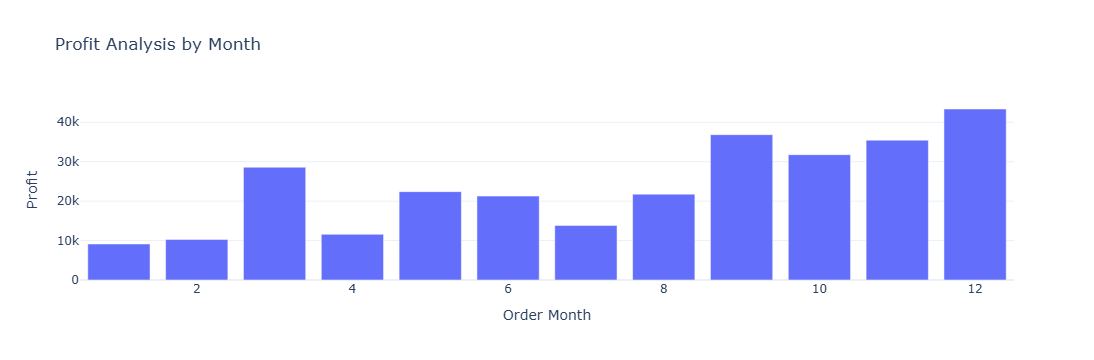

In [57]:
fig=px.bar(profit_by_month,
            x='Order Month',
            y='Profit',
            title='Profit Analysis by Month')
fig.show()

# Profit by Category

In [58]:
profit_by_category=data.groupby('Category')['Profit'].sum().reset_index()
profit_by_category

,Category,Profit
0,Furniture,18451.2728
1,Office Supplies,122490.8008
2,Technology,145454.9481


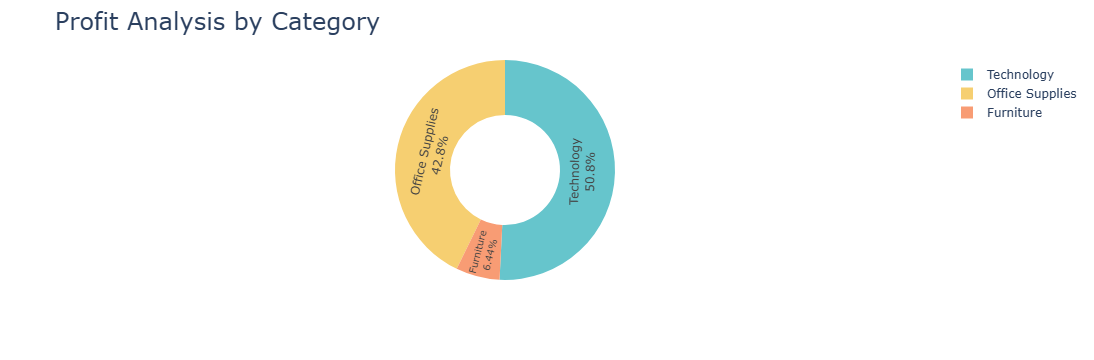

In [62]:
fig= px.pie(profit_by_category,values='Profit',names='Category',hole=0.5,color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_traces(textposition='inside',textinfo='percent+label')
fig.update_layout(title_text='Profit Analysis by Category',title_font=dict(size=24))
fig.show()

# Profit by Sub Category

In [64]:
profit_by_Subcategory=data.groupby('Sub-Category')['Profit'].sum().reset_index()
profit_by_Subcategory

,Sub-Category,Profit
0,Accessories,41936.6357
1,Appliances,18138.0054
2,Art,6527.7870
3,Binders,30221.7633
4,Bookcases,-3472.5560
5,Chairs,26590.1663
6,Copiers,55617.8249
7,Envelopes,6964.1767
8,Fasteners,949.5182
9,Furnishings,13059.1436


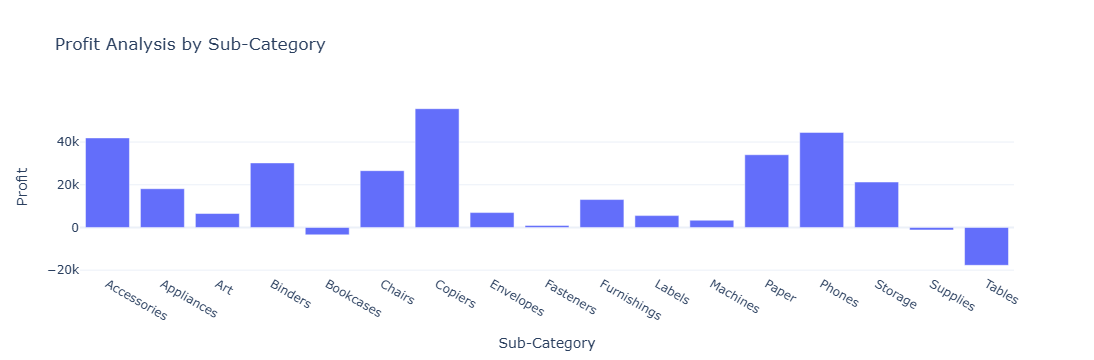

In [67]:
fig=px.bar(profit_by_Subcategory,
            x='Sub-Category',
            y='Profit',
            title='Profit Analysis by Sub-Category')
fig.show()

# Sales and Profit - Customer Segment

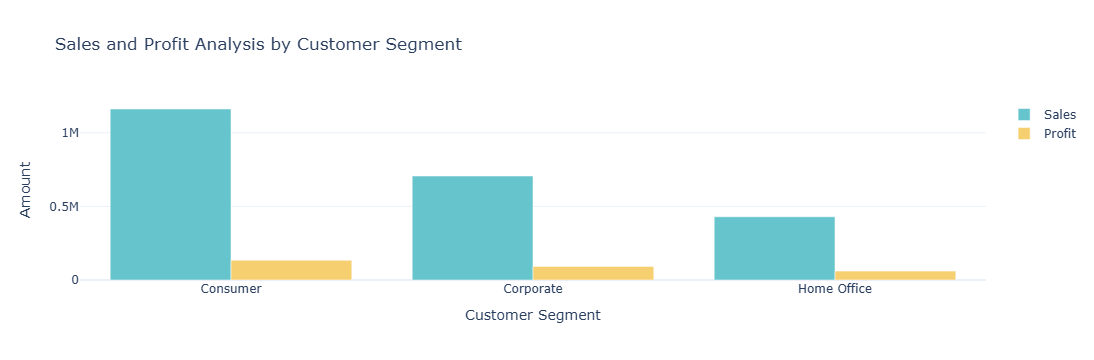

In [77]:
import plotly.graph_objects as go
from plotly import colors
sales_profit_by_segment= data.groupby('Segment').agg({'Sales':'sum','Profit':'sum'}).reset_index()
color_palette = colors.qualitative.Pastel
fig = go.Figure()
fig.add_trace(go.Bar(x=sales_profit_by_segment['Segment'],y=sales_profit_by_segment['Sales'],name='Sales',marker_color=color_palette[0]))
fig.add_trace(go.Bar(x=sales_profit_by_segment['Segment'],y=sales_profit_by_segment['Profit'],name='Profit',marker_color=color_palette[1]))
fig.update_layout(title='Sales and Profit Analysis by Customer Segment',
                  xaxis_title='Customer Segment',yaxis_title='Amount')
fig.show()


# Sales to Profit Ratio

In [78]:
sales_profit_by_segment= data.groupby('Segment').agg({'Sales':'sum','Profit':'sum'}).reset_index()
sales_profit_by_segment['Sales_to_Profit_Ratio']=sales_profit_by_segment['Sales']/sales_profit_by_segment['Profit']
print(sales_profit_by_segment[['Segment','Sales_to_Profit_Ratio']])

       Segment  Sales_to_Profit_Ratio
0     Consumer               8.659471
1    Corporate               7.677245
2  Home Office               7.125416
